# Linear Regression in StatsModels - Lab

## Introduction

It's time to apply the StatsModels skills from the previous lesson! In this lab , you'll explore a slightly more complex example to study the impact of spending on different advertising channels on total sales.

## Objectives

You will be able to:

* Perform a linear regression using StatsModels
* Evaluate a linear regression model using StatsModels
* Interpret linear regression coefficients using StatsModels

## Let's Get Started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

The columns in this dataset are:

1. `sales`: the number of widgets sold (in thousands)
2. `tv`: the amount of money (in thousands of dollars) spent on TV ads
3. `radio`: the amount of money (in thousands of dollars) spent on radio ads
4. `newspaper`: the amount of money (in thousands of dollars) spent on newspaper ads

## Step 1: Exploratory Data Analysis

In [9]:
# Load necessary libraries and import the data
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt



In [11]:
# Check the columns and first few rows
df=pd.read_csv("advertising.csv")
print(df.columns)
df.head()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
# Generate summary statistics for data with .describe()
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Based on what you have seen so far, describe the contents of this dataset. Remember that our business problem is asking us to build a model that predicts sales.

In [14]:

# Your answer here
# The dataset contains 200 observations with information on advertising spending across three channels—TV, radio, and newspaper—and the corresponding sales of widgets. The sales column is the dependent variable we want to predict, while TV, radio, and newspaper are the independent variables. TV advertising shows the highest spending and variability, suggesting it might have a strong impact on sales, whereas radio and newspaper spend less on average. Overall, this dataset allows us to explore how different advertising channels influence sales and build a predictive model.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Every record in our dataset shows the advertising budget spend on TV, newspaper, and radio campaigns as well as a target variable, sales.

The count for each is 200, which means that we do not have any missing data.

Looking at the mean values, it appears that spending on TV is highest, and spending on radio is lowest. This aligns with what we see in the output from `head()`.
    
</details>

Now, use scatter plots to plot each predictor (TV, radio, newspaper) against the target variable.

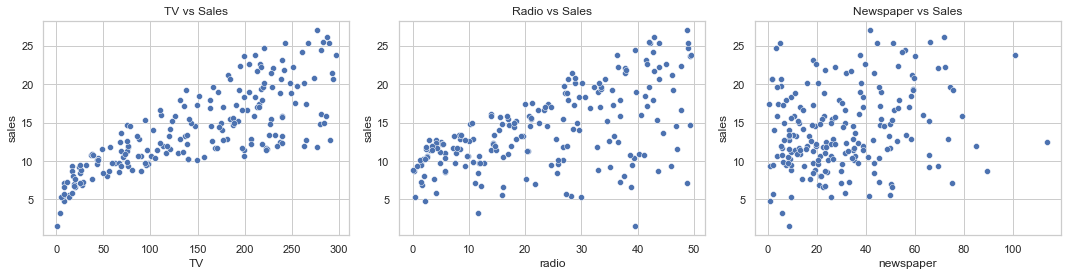

In [15]:
# Visualize the relationship between the preditors and the target using scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot TV vs Sales
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='sales', data=df)
plt.title('TV vs Sales')

# Plot Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='radio', y='sales', data=df)
plt.title('Radio vs Sales')

# Plot Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='newspaper', y='sales', data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


Does there appear to be a linear relationship between these predictors and the target?

In [16]:
# Record your observations on linearity here 
## Observations on Linearity:

# TV vs Sales: Shows a strong positive linear relationship; as TV spending increases, sales also increase consistently.

# Radio vs Sales: Shows a moderate positive linear relationship; higher radio spending generally corresponds to higher sales.

# Newspaper vs Sales: Relationship appears weak or unclear; sales do not consistently increase with newspaper spending.

# Conclusion: TV and radio are suitable for linear regression modeling, while newspaper may have limited predictive value in a linear model.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

`TV` seems to be a good predictor because it has the most linear relationship with sales.

`radio` also seems to have a linear relationship, but there is more variance than with `TV`. We would expect a model using `radio` to be able to predict the target, but not as well as a model using `TV`.

`newspaper` has the least linear-looking relationship. There is a lot of variance as well. It's not clear from this plot whether a model using `newspaper` would be able to predict the target.
    
</details>

## Step 2: Run a Simple Linear Regression with `TV` as the Predictor

As the analysis above indicates, `TV` looks like it has the strongest relationship with `sales`. Let's attempt to quantify that using linear regression.

In [17]:
# Import libraries
import statsmodels.api as sm
# Determine X and y values
X = df['TV']           # independent variable
y = df['sales']        # dependent variable
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(y, X).fit()

model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           1.47e-42
Time:                        12:02:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Get model results
results = model

# Display results summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           1.47e-42
Time:                        12:03:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Step 3: Evaluate and Interpret Results from Step 2

How does this model perform overall? What do the coefficients say about the relationship between the variables?

In [19]:
# Your answer here
# Model Performance

# The R-squared = 0.612 means that 61.2% of the variation in sales is explained by TV advertising alone.

# This is a moderately strong model for a single predictor. It suggests TV spend is an important driver of sales, though other factors also contribute.

# The F-statistic is very large (312.1) with p < 0.001, showing the model overall is statistically significant.

# Coefficients Interpretation

# Intercept (const = 7.03):
# If no money is spent on TV advertising, average sales are still around 7 units (in thousands).

# TV coefficient (0.0475):
# For every additional $1,000 spent on TV advertising, sales increase by about 0.0475 units (≈47 items if sales are in thousands) on average.

# The positive coefficient confirms a direct positive relationship: higher TV spend → higher sales.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Overall the model and coefficients are **statistically significant**, with all p-values well below a standard alpha of 0.05.

The R-squared value is about 0.61 i.e. **61% of the variance in the target variable can be explained by TV spending**.

The intercept is about 7.0, meaning that if we spent 0 on TV, we would expect sales of about 7k widgets (the units of `sales` are in thousands of widgets).

The `TV` coefficient is about 0.05, meaning that **for each additional &dollar;1k spent on TV (the units of `TV` are in thousands of dollars), we would expect to sell an additional 50 widgets**. (More precisely, 47.5 widgets.)

Note that all of these coefficients represent associations rather than causation. It's possible that better sales are what leads to more TV spending! Either way, `TV` seems to have a strong relationship with `sales`.

</details>

## Step 4: Visualize Model with `TV` as Predictor

Create at least one visualization that shows the prediction line against a scatter plot of `TV` vs. sales, as well as at least one visualization that shows the residuals.

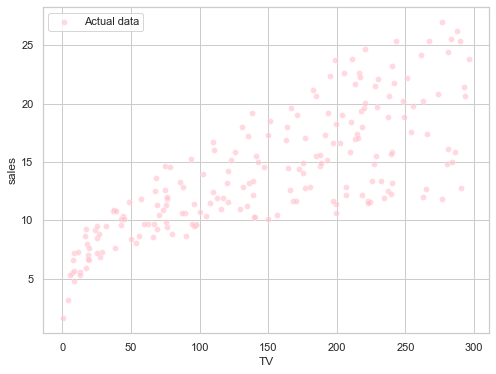

In [22]:
# Plot the model fit (scatter plot and regression line)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Scatter plot with regression line ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["TV"], y=df["sales"], color="pink", alpha=0.6, label="Actual data")

# Predicted values
y_pred = model.predict(X)

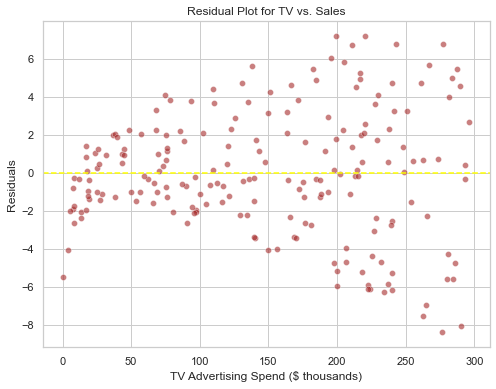

In [23]:
# Plot the model residuals
residuals = y - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["TV"], y=residuals, color="brown", alpha=0.6)
plt.axhline(0, color="yellow", linestyle="--")

plt.xlabel("TV Advertising Spend ($ thousands)")
plt.ylabel("Residuals")
plt.title("Residual Plot for TV vs. Sales")
plt.show()

## Step 5: Repeat Steps 2-4 with `radio` as Predictor

Compare and contrast the model performance, coefficient value, etc. The goal is to answer the business question described above.

In [24]:
# Run model
import statsmodels.api as sm

# --- Step 2: Run model with radio as predictor ---
X_radio = df[["radio"]]
X_radio = sm.add_constant(X_radio)   # add intercept
y = df["sales"]

model_radio = sm.OLS(y, X_radio).fit()



# Display results
print(model_radio.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           4.35e-19
Time:                        15:52:04   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

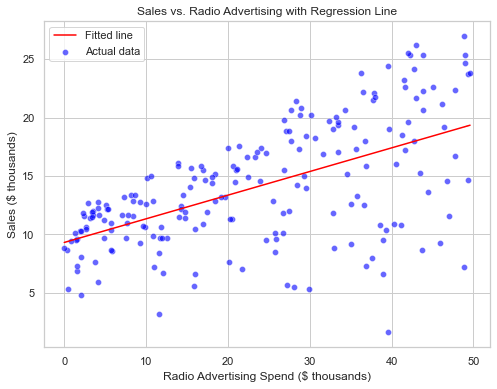

In [25]:
# Visualize model fit
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["radio"], y=df["sales"], color="blue", alpha=0.6, label="Actual data")
# Predictions
y_pred_radio = model_radio.predict(X_radio)

# Regression line
sns.lineplot(x=df["radio"], y=y_pred_radio, color="red", label="Fitted line")

plt.xlabel("Radio Advertising Spend ($ thousands)")
plt.ylabel("Sales ($ thousands)")
plt.title("Sales vs. Radio Advertising with Regression Line")
plt.legend()
plt.show()


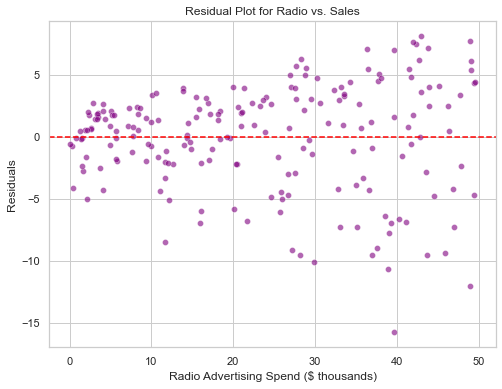

In [26]:
# Visualize residuals
residuals_radio = y - y_pred_radio

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["radio"], y=residuals_radio, color="purple", alpha=0.6)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Radio Advertising Spend ($ thousands)")
plt.ylabel("Residuals")
plt.title("Residual Plot for Radio vs. Sales")
plt.show()

In [27]:
# Your interpretation here
# R² = 0.332 → About 33% of the variation in sales can be explained by radio advertising alone. This is much weaker than TV’s 61%, meaning radio is not as strong a predictor.

# Coefficient for radio = 0.2025 → For every extra $1,000 spent on radio advertising, sales increase by about 0.20 units, holding other factors constant.

# Intercept = 9.31 → If radio spending were $0, average sales would be about 9.3 units.

# p-value < 0.001 → The relationship is statistically significant, so radio does matter, but its explanatory power is limited compared to TV.

# Visual Insights

# Scatter plot with regression line → The line slopes upward, confirming a positive relationship, but the points are more spread out than in the TV model.

# Residual plot → Residuals are less evenly spread and show more variation, suggesting the model doesn’t capture sales patterns as well as TV.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Same as with `TV`, the model using `radio` to predict `sales` as well as its parameters are **statistically significant** (p-values well below 0.05).

However, this model explains less of the variance. It only **explains about 33% of the variance in `sales`**, compared to about 61% explained by `TV`. If our main focus is the percentage of variance explained, this is a worse model than the `TV` model.

On the other hand, the coefficient for `radio` is much higher. **An increase of &dollar;1k in radio spending is associated with an increase of sales of about 200 widgets!** This is roughly 4x the increase of widget sales that we see for `TV`.

Visualizing this model, it doesn't look much different from the `TV` model.
    
So, how should we answer the business question? Realistically, you would need to return to your stakeholders to get a better understanding of what they are looking for. Do they care more about the variable that explains more variance, or do they care more about where an extra &dollar;1k of advertising spending is likely to make the most difference?

</details>

## Step 6: Repeat Steps 2-4 with `newspaper` as Predictor

Once again, use this information to compare and contrast.

In [28]:
# Run model
import statsmodels.api as sm

# Define X and y
X_newspaper = sm.add_constant(df["newspaper"])  # add intercept
y = df["sales"]

# Fit OLS model
model_newspaper = sm.OLS(y, X_newspaper).fit()

# Display results
print(model_newspaper.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 07 Sep 2025   Prob (F-statistic):            0.00115
Time:                        15:57:45   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

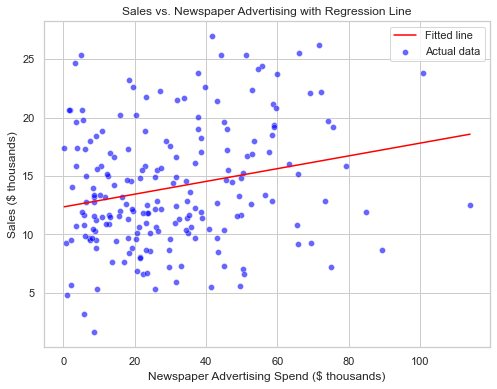

In [29]:
# Visualize model fit
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["newspaper"], y=df["sales"], color="blue", alpha=0.6, label="Actual data")

# Predictions
y_pred_newspaper = model_newspaper.predict(X_newspaper)

# Regression line
sns.lineplot(x=df["newspaper"], y=y_pred_newspaper, color="red", label="Fitted line")

plt.xlabel("Newspaper Advertising Spend ($ thousands)")
plt.ylabel("Sales ($ thousands)")
plt.title("Sales vs. Newspaper Advertising with Regression Line")
plt.legend()
plt.show()

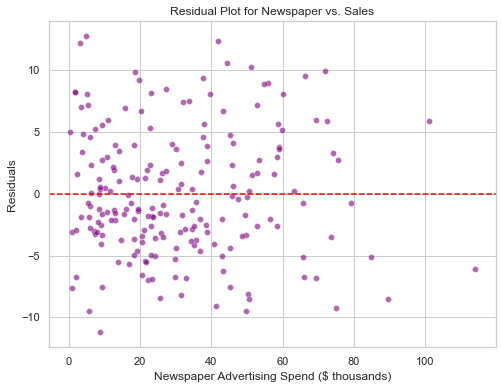

In [30]:
# Visualize residuals
residuals_newspaper = y - y_pred_newspaper

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["newspaper"], y=residuals_newspaper, color="purple", alpha=0.6)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Newspaper Advertising Spend ($ thousands)")
plt.ylabel("Residuals")
plt.title("Residual Plot for Newspaper vs. Sales")
plt.show()

In [31]:
# Your interpretation here
# Model performance:

# The R² is only 0.052, meaning newspaper advertising explains about 5.2% of the variation in sales.

# Compared to TV (61%) and radio (33%), this is very weak.

# Coefficient:

# The slope for newspaper is 0.0547, which means:

# For every additional $1,000 spent on newspaper ads, sales increase by about 0.055 thousand units (≈ 55 units).

# The effect is small and practically insignificant for business decision-making.

# Statistical significance:

# The p-value for the newspaper coefficient is 0.001, which is below 0.05, so it is statistically significant.

# However, statistical significance does not mean practical significance—even though the effect is “real,” it is too small to matter much in driving sales.

# Residuals:

#The residuals are widely scattered, showing that the model does not capture much of the variance.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Technically our model and coefficients are **still statistically significant** at an alpha of 0.05, but the p-values are much higher. For both the F-statistic (overall model significance) and the `newspaper` coefficient, our p-values are about 0.001, meaning that there is about a 0.1% chance that a variable with _no linear relationship_ would produce these statistics. That is a pretty small false positive rate, so we'll consider the model to be statistically significant and move on to interpreting the other results.

The R-Squared here is the smallest we have seen yet: 0.05. This means that **the model explains about 5% of the variance in `sales`**. 5% is well below both the `radio` model (33%) and the `TV` model (61%).

The coefficient is also small, though similar to the `TV` coefficient. **An increase of &dollar;1k in newspaper spending is associated with about 50 additional widget sales** (more precisely, about 54.7). This is still much less than the 200-widget increase associated with &dollar;1k of additional `radio` spending.

Visualizing this model, the best-fit line is clearly not a strong predictor. On the other hand, the residuals exhibit _homoscedasticity_, meaning that the distribution of the residuals doesn't vary much based on the value of `newspaper`. This contrasts with the `radio` and `TV` residuals which exhibit a "cone" shape, where the errors are larger as the x-axis increases. Homoscedasticity of residuals is a good thing, which we will describe more in depth when we discuss regression assumptions.

Once again, how should we answer the business question? Regardless of the framing, it is unlikely that `newspaper` is the answer that your stakeholders want. This model has neither the highest R-Squared nor the highest coefficient.

</details>

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You used StatsModels to perform linear regression and evaluated your models using statistical metrics as well as visualizations. You also reached a conclusion about how you would answer a business question using linear regression.